<a href="https://colab.research.google.com/github/selamtigistu1/MachineLearning/blob/main/2_Building_Neural_Networks_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

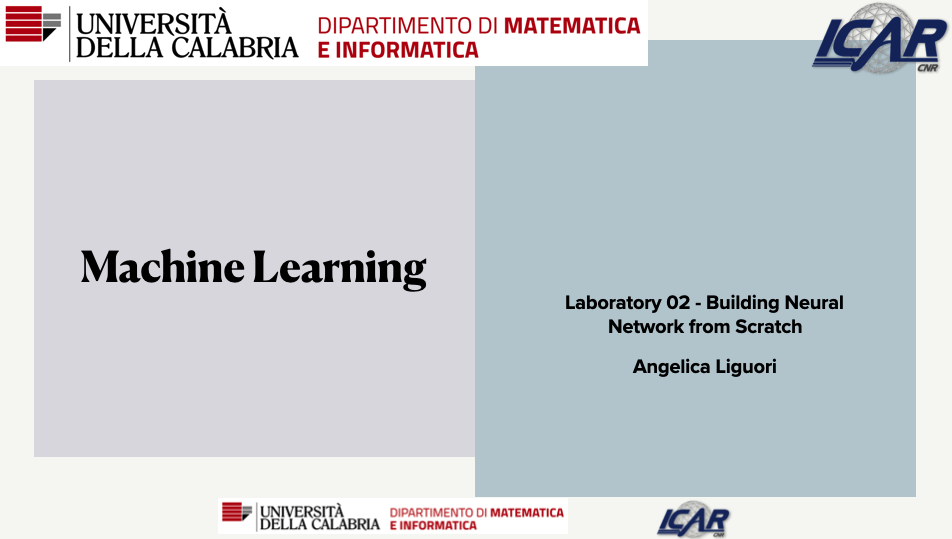

# **Summarizing neural network**

A neural network is a tuple that is composed by:

* *g* the graph
* *l* the loss function
* *o* the optimizer
* *i* the initialization
* *fpp* the *fix point procedure*

## **Graph**: network topology

*   g = {N, E} is a weighted labeled directed graph
*   Each node *i* is called *neuron* or *perceptron*
    * It is equipped with two labels: *(i)* A value *ai* that will called **activation** in the next and *(ii)* an **activation function** *fi* that, applied to the activation, produces an output *zi*

* Each edge *e = {j --> i}* is equipped with a **weight** *wji* 
* Each node *i* is involved in an additional special edge, with a ghost node, whose weight is called **bias** (*bi*)
*   Each neuron is a calculus unit

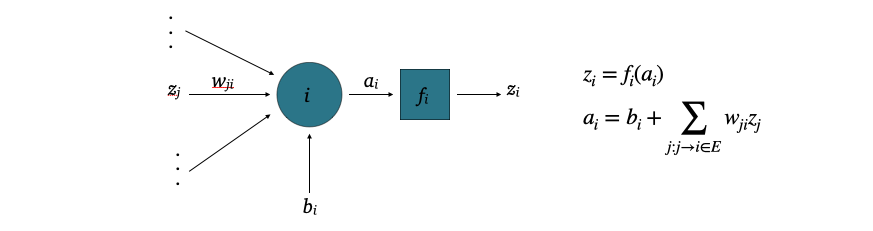




* A combination of connected neurons builds the graph up

* Typically, there are:
  * one input layer
  * one or more hidden layers
  * one output layer

  and each layer contains one or more neurons.

 
*   A network with one or more hidden layers is called *feedforward network* or *multilayer perceptron (MLP)*.

*   It is called feedforward because the information only travels forward the neural networks.

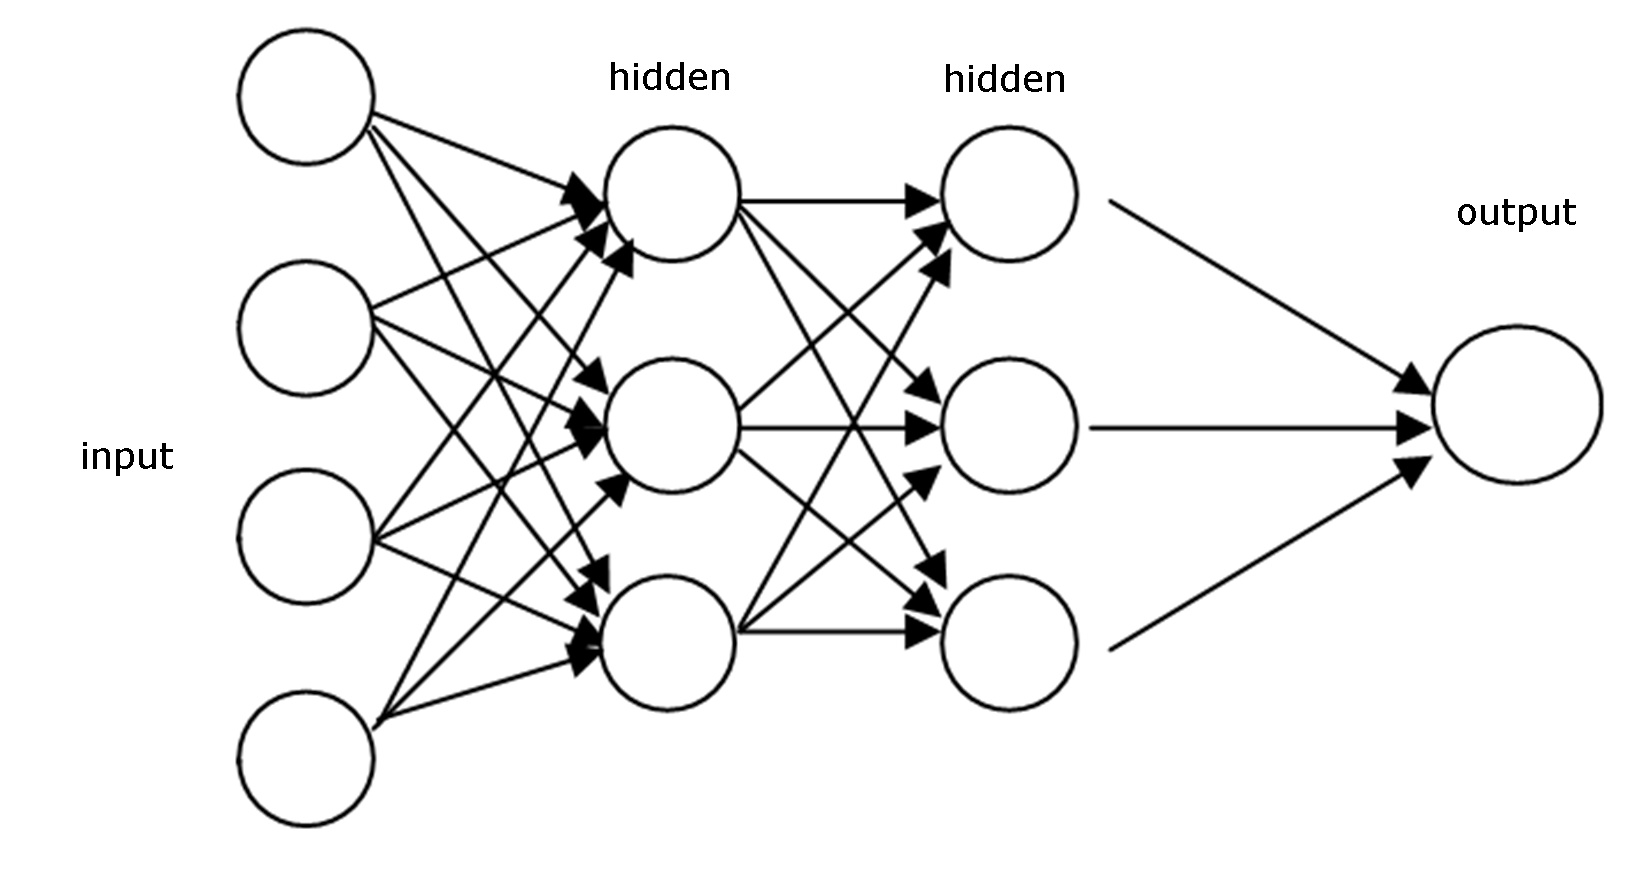

* The activation function is choosen according to the output that we want.

# Sigmoid Function

* Suppose we want values between 0 and 1, we can use the sigmoid as activation function. In fact, this function returns 0.5 when the input is 0. It returns a value close to 1 if the input is a large positive number and returns a value close to zero in case of negative input.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def sigmoid(input):
  return 1. / (1. + np.exp(-input))

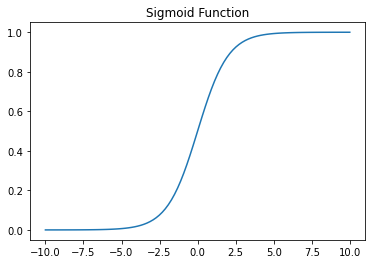

In [ ]:
input = np.linspace(-10, 10, 100)

plt.plot(input, sigmoid(input))
plt.title('Sigmoid Function')
plt.show()

# Hyperbolic Tangent (Tanh) Function

* The range of the tanh function is from -1 to 1.

In [ ]:
def tanh(input):
  return (np.exp(input) - np.exp(-input)) / (np.exp(input) + np.exp(-input))

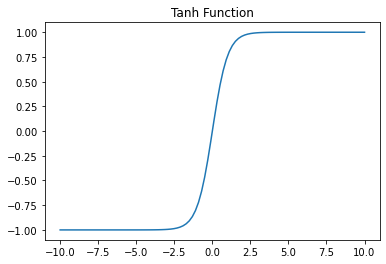

In [ ]:
input = np.linspace(-10, 10, 100)

plt.plot(input, tanh(input))
plt.title('Tanh Function')
plt.show()

# Rectified Linear Unit (ReLU)
* The range is from 0 to infinity

* In fact, the function returns 0 when the input is less than zero, otherwise returns the value itself

In [ ]:
def relu(input):
  return np.maximum(0, input)

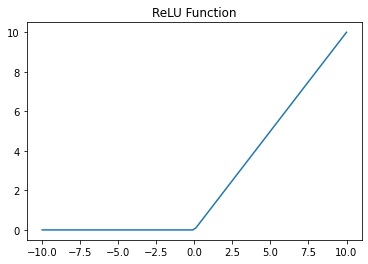

In [ ]:
input = np.linspace(-10, 10, 100)

plt.plot(input, relu(input))
plt.title('ReLU Function')
plt.show()

## **Loss function**

* The graph is actually a non linear algebraic operator

* The operator is composed by a priori unknown variables:
  * The weights *W* and the bias *B*

* The learning phase of a neural network aims to finding the  "best" values for *W* and *B*
  * Finding the "best" values needs to optimize an objective function that expresses the semantics of the analysis goals
  * In neural networks the objective function is called *loss function* and it should be minimized
  * The *loss function* represents the error in producing an output as close as possible to the desidered one, by applying its operator *g* on the output

* The objective of a network is:

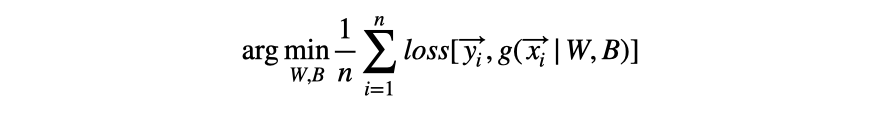


## **Optimizer**

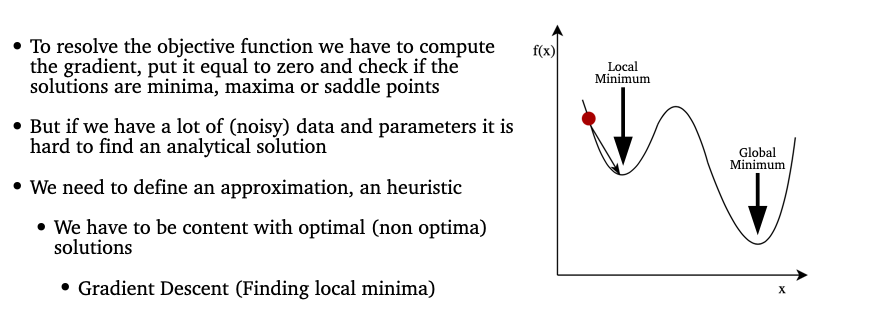

## **Gradient Descent**

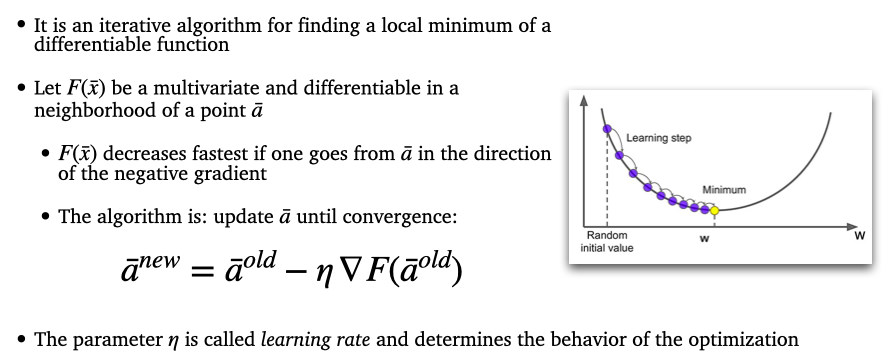 


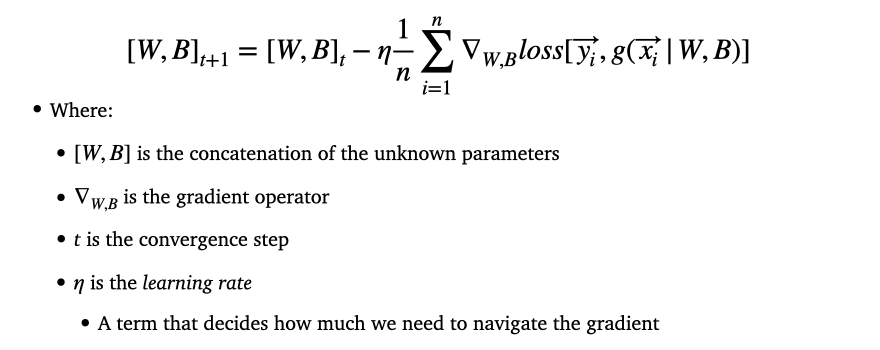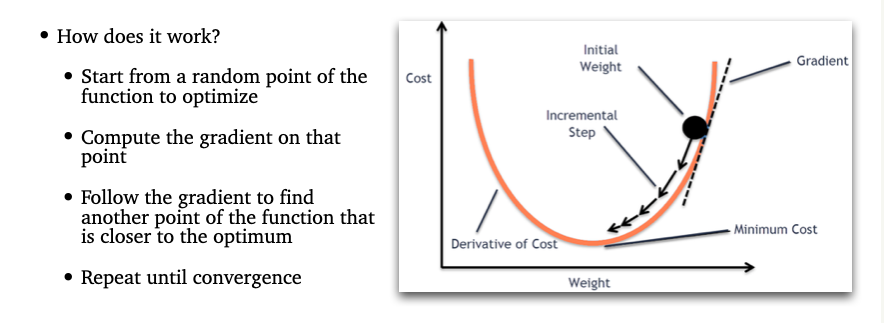


## **Initialization**

* In Gradient Descent, edges weights and biases need an initial value

* The initialization strategy may strongly change the network behavior

* Since we are searching for optimal solution, the starting point of the fix point procedure (Gradient Descent) is crucial

## **Fix Point Procedure**

* Training a neural network is a simple procedure
  * We are search for a fix point as loss optimal solution

* The algorithm


          net = CustomNeuralNetwork(...)
          initialize_weights_and_biases(net)
          optimizer = myOptimizer(...)
          loss_function = myLossFunction(...)

          epochs = ... # the number of dataset scans
          history = [] # a list containing the loss evolution

          for epoch in range(epochs):
            optimizer.reset() # it may have an internal status
            loss = loss_fuction(out_target, net(input))
            back_propagation(loss, optimizer, net)

            history.append(loss)


* The training is performed through backpropagation

* Backpropagation is an iterative procedure which uses the chain rule for derivatives to propagate the error back from the output layer all the way to input layer. 

## **Building Feedforward Neural Network from Scratch in Python**

First, we will build a simple feedforward neural network with only one hidden layer. Then, we will build a generic feedforward neural network.

The neural network that we will build is:

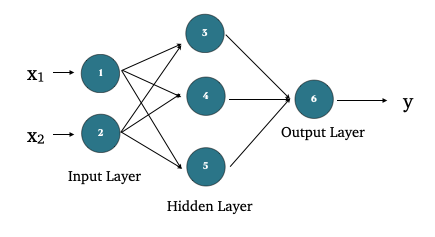

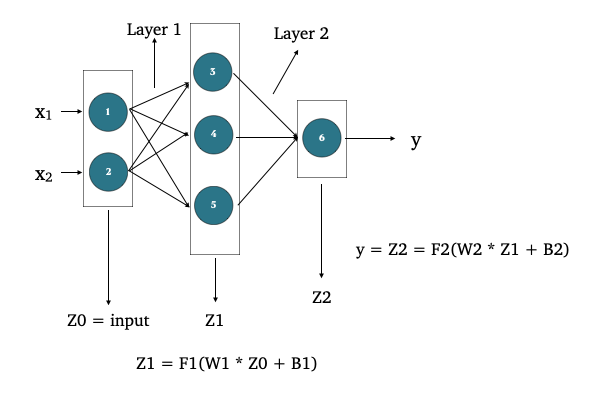

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed

In [ ]:
class SimpleNeuralNetwork:
  def __init__(self, n_input = 2, n_hidden = 3, n_output = 1):
    # initialize the weights and biases
    self.W1= np.random.rand(n_input,n_hidden)
    self.W2 = np.random.rand(n_hidden,n_output)

    self.B1 = np.zeros(n_hidden)
    self.B2 = np.zeros(n_output)

  def loss(self, out, out_pred):
    return np.mean(np.sqrt(np.abs(out - out_pred)))

  def activationFunction(self, A):
    return 1. / (1. + np.exp(-A))

  def gradActFuction(self, out):
    return out * (1 - out)

  def forward(self, input):
    self.Z0 = input

    self.A1 = np.dot(self.Z0, self.W1) + self.B1
    self.Z1 = self.activationFunction(self.A1)

    self.A2 = np.dot(self.Z1, self.W2) + self.B2
    self.Z2 = self.activationFunction(self.A2)

    return self.Z2

  def grad(self, input, output, output_pred, learning_rate):
    self.delta2 = (output_pred - output) * self.gradActFuction(output_pred)
    self.dW2 = np.matmul(self.Z1.T, self.delta2)
    self.dB2 = np.sum(self.delta2, axis = 0)

    self.delta1 = np.matmul(self.delta2, self.W2.T) * self.gradActFuction(self.Z1)
    self.dW1 = np.matmul(self.Z0.T, self.delta1)
    self.dB1 = np.sum(self.delta1, axis = 0)

    m = input.shape[1]
    # update
    self.W1 -= learning_rate * self.dW1 / m
    self.W2 -= learning_rate * self.dW2 / m

    self.B1 -= learning_rate * self.dB1 / m
    self.B2 -= learning_rate * self.dB2 / m

  def fit(self, input, output, epochs = 1, learning_rate=0.05):
    history = []

    for epoch in range(epochs):
      output_pred = self.forward(input)
      loss = self.loss(output, output_pred)
      history.append(loss)
      
      self.grad(input, output, output_pred, learning_rate)

    self.plot_loss(history)

  def predict(self, input):
    o_pred = self.forward(input)
    return np.array(o_pred)

  def plot_loss(self, h):
    plt.plot(h)
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.show()

In [ ]:
data = np.array([[0, 1], [1,0], [0,0], [1, 1], [0,1]])
labels = np.array([0, 1, 0, 1, 0])
labels = labels.reshape((labels.shape[0], 1))

print(data)
print(labels)

[[0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 1]]
[[0]
 [1]
 [0]
 [1]
 [0]]


In [ ]:
net = SimpleNeuralNetwork()

In [ ]:
net.W1

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452]])

In [ ]:
net.W2

array([[0.05808361],
       [0.86617615],
       [0.60111501]])

In [ ]:
net.B1

array([0., 0., 0.])

In [ ]:
net.B2

array([0.])

* Suppose we have some information about age and annual income of some people

* We also know whether these people are ill or not

* We want to predict whether an unknown person is ill or not given data about his age and annual income

In [ ]:
from google.colab import files
import io
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [ ]:
uploaded = files.upload()

Saving toy_dataset.csv to toy_dataset.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['toy_dataset.csv']))
df

,Age,Income,Illness
0,41,40367.0,No
1,54,45084.0,No
2,42,52483.0,No
3,40,40941.0,No
4,46,50289.0,No
...,...,...,...
995,37,48650.0,No
996,63,38553.0,No
997,38,45329.0,No
998,64,67187.0,Yes


In [ ]:
df.Illness = pd.Categorical(df.Illness).codes

In [ ]:
df

,Age,Income,Illness
0,41,40367.0,0
1,54,45084.0,0
2,42,52483.0,0
3,40,40941.0,0
4,46,50289.0,0
...,...,...,...
995,37,48650.0,0
996,63,38553.0,0
997,38,45329.0,0
998,64,67187.0,1


In [ ]:
data = np.array(df.drop(columns='Illness'))
labels = np.array(df['Illness'])
labels = labels.reshape(labels.shape[0],1)

data = scale(data)

x_train, x_val, y_train, y_val = train_test_split(data, labels, random_state=0)

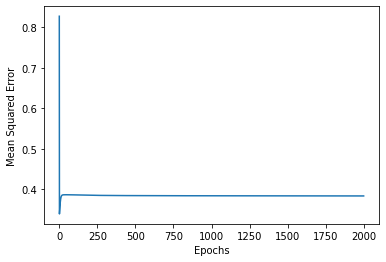

In [ ]:
net = SimpleNeuralNetwork()
net.fit(x_train, y_train, epochs = 2000)

In [ ]:
y_pred_train = net.predict(x_train)
y_pred_bin_train = (y_pred_train >= 0.5).astype("int")

y_pred_val = net.predict(x_val)
y_pred_bin_val = (y_pred_val >= 0.5).astype("int")

accuracy_train = accuracy_score(y_pred_bin_train, y_train)
accuracy_val = accuracy_score(y_pred_bin_val, y_val)
#model performance
print("Training accuracy", accuracy_train)
print("Validation accuracy", accuracy_val)

Training accuracy 0.8973333333333333
Validation accuracy 0.924


* Now, we build a generic feedforward neural network

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed

In [ ]:
class myNeuralNetwork: # define Feedforward Network
  
  def __init__(self, n_inputs, n_hiddens = [2], n_outputs = 1):
    seed(42)
    # n_hiddens is a list since we can have one or more hidden layers
    self.n_inputs = n_inputs
    self.n_hiddens = n_hiddens
    self.n_outputs = n_outputs
    
    self.shape = [self.n_inputs] + self.n_hiddens + [self.n_outputs]

    self.W = {}
    self.B = {}

    for i in range(len(self.n_hiddens)+1):
      self.W[i+1] = np.random.rand(self.shape[i], self.shape[i+1])
      self.B[i+1] = np.zeros(self.shape[i+1])

  def activationFunction(self, A):
    return  1. / (1. + np.exp(-A)) # sigmoid

  def loss(self, y, y_pred):
    return np.mean(np.sqrt(np.abs(y - y_pred)))

  def forward(self, input):
    self.A = {}
    self.Z = {}

    self.Z[0] = input

    for i in range(len(self.n_hiddens)+1):
      self.A[i+1] = np.dot(self.Z[i], self.W[i+1]) + self.B[i+1]
      self.Z[i+1] = self.activationFunction(self.A[i+1])

    output = self.Z[len(self.n_hiddens)+1]

    return output

  def grad_activationFunction(self, out):
    return out * (1 - out)

  def grad(self, input, output, output_pred, learning_rate):
    self.dW = {}
    self.dB = {}
    self.delta = {}
    self.dZ = {}

    self.error = output_pred - output
    self.delta[len(self.n_hiddens)+1] = self.error * self.grad_activationFunction(output_pred)

    for k in range(len(self.n_hiddens)+1, 0, -1):
      self.dW[k] = np.matmul(self.Z[k-1].T, self.delta[k])
      self.dB[k] = np.sum(self.delta[k], axis = 0)
      self.delta[k-1] = np.matmul(self.delta[k], self.W[k].T) * self.grad_activationFunction(self.Z[k-1])


    m = input.shape[1]
    # update weights
    for i in range(len(self.n_hiddens)+1):
        self.W[i+1] -= learning_rate * self.dW[i+1] / m
        self.B[i+1] -= learning_rate * self.dB[i+1] / m
      

  def fit(self, input, output, epochs = 1, learning_rate=0.05):
    history = []

    for epoch in range(epochs):
      output_pred = self.forward(input)
      loss = self.loss(output, output_pred)
      history.append(loss)
      
      self.grad(input, output, output_pred, learning_rate)

    self.plot_loss(history)

  def predict(self, input):
    o_pred = self.forward(input)
    return np.array(o_pred)

  def plot_loss(self, loss):
    plt.plot(loss)
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.show()


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

* Suppose we have some information about smoking habits, obesity, and exercise habits of some people. 
* We also know whether these people are diabetic or not.

* Our dataset looks like this:

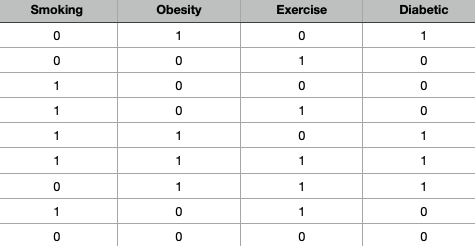

* Here 1 refers to true and 0 refers to false. For instance, the first person has values of 0, 1, 0 which means that the person doesn't smoke, is obese, and doesn't exercise. The person is also diabetic.

* It is clearly evident from the dataset that a person's obesity is indicative of him being diabetic. 

* We want to predict whether an unknown person is diabetic or not given data about his exercise habits, obesity, and smoking habits. 

In [ ]:
feature_set = np.array([[0,1,0],[0,0,1],[1,0,0], [1, 0, 1], [1,1,0],[1,1,1], [0,1,1], [1,0,1], [0,0,0]])
labels = np.array([1,0,0,0, 1,1,1, 0, 0])
labels = labels.reshape(labels.shape[0],1)

n_input = feature_set.shape[1]
x_train, x_val, y_train, y_val = train_test_split(feature_set, labels, random_state=0)

In [ ]:
net = myNeuralNetwork(n_input)

In [ ]:
net.W

{1: array([[0.37454012, 0.95071431],
        [0.73199394, 0.59865848],
        [0.15601864, 0.15599452]]), 2: array([[0.05808361],
        [0.86617615]])}

In [ ]:
net.forward(feature_set)

array([[0.64524593],
       [0.62201323],
       [0.65907053],
       [0.66541381],
       [0.68093911],
       [0.68530547],
       [0.65256132],
       [0.66541381],
       [0.61351932]])

In [ ]:
net.A

{1: array([[0.73199394, 0.59865848],
        [0.15601864, 0.15599452],
        [0.37454012, 0.95071431],
        [0.53055876, 1.10670883],
        [1.10653406, 1.54937279],
        [1.2625527 , 1.70536731],
        [0.88801258, 0.754653  ],
        [0.53055876, 1.10670883],
        [0.        , 0.        ]]), 2: array([[0.59820673],
        [0.49810218],
        [0.65915494],
        [0.68751461],
        [0.75809093],
        [0.77826224],
        [0.63031691],
        [0.68751461],
        [0.46212988]])}

In [ ]:
net.Z

{0: array([[0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 1],
        [1, 1, 0],
        [1, 1, 1],
        [0, 1, 1],
        [1, 0, 1],
        [0, 0, 0]]), 1: array([[0.67524268, 0.64534933],
        [0.53892573, 0.53891974],
        [0.59255557, 0.72125881],
        [0.62961342, 0.75151503],
        [0.75148239, 0.82482312],
        [0.77946523, 0.84623444],
        [0.70847987, 0.68019172],
        [0.62961342, 0.75151503],
        [0.5       , 0.5       ]]), 2: array([[0.64524593],
        [0.62201323],
        [0.65907053],
        [0.66541381],
        [0.68093911],
        [0.68530547],
        [0.65256132],
        [0.66541381],
        [0.61351932]])}

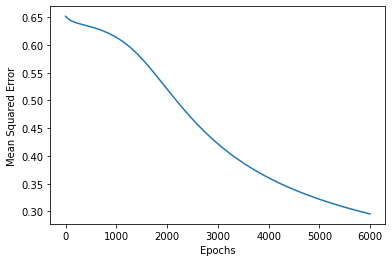

In [ ]:
net = myNeuralNetwork(n_input)
net.fit(x_train, y_train, epochs=6000)

In [ ]:
y_pred_train = net.predict(x_train)
y_pred_bin_train = (y_pred_train >= 0.5).astype("int")

y_pred_val = net.predict(x_val)
y_pred_bin_val = (y_pred_val >= 0.5).astype("int")

accuracy_train = accuracy_score(y_pred_bin_train, y_train)
accuracy_val = accuracy_score(y_pred_bin_val, y_val)
#model performance
print("Training accuracy", accuracy_train)
print("Validation accuracy", accuracy_val)

Training accuracy 1.0
Validation accuracy 1.0


In [ ]:
print('Predicted value: ', y_pred_bin_val.flatten())
print('True value: ', y_val.flatten())

Predicted value:  [0 0 0]
True value:  [0 0 0]


In [ ]:
from sklearn.datasets import make_blobs

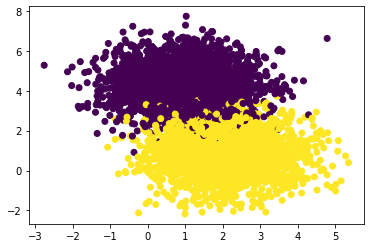

In [ ]:
#Generating 1000 observations with 2 labels
data, labels = make_blobs(n_samples=5000, centers=2, n_features=2, random_state=0)
labels = labels.reshape(labels.shape[0],1)

#visualize the data
plt.scatter(data[:,0], data[:,1], c=labels)
plt.show()

#split the binary data
x_train, x_val, y_train, y_val = train_test_split(data, labels, stratify=labels, random_state=0)

n_input = x_train.shape[1]

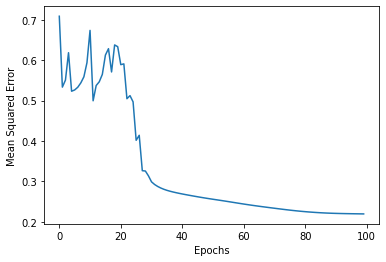

In [ ]:
net = myNeuralNetwork(n_input)
net.fit(x_train, y_train, epochs=100)

In [ ]:
y_pred_train = net.predict(x_train)
y_pred_bin_train = (y_pred_train >= 0.5).astype("int")

y_pred_val = net.predict(x_val)
y_pred_bin_val = (y_pred_val >= 0.5).astype("int")

accuracy_train = accuracy_score(y_pred_bin_train, y_train)
accuracy_val = accuracy_score(y_pred_bin_val, y_val)
#model performance
print("Training accuracy", accuracy_train)
print("Validation accuracy", accuracy_val)

Training accuracy 0.9674666666666667
Validation accuracy 0.9696


In [ ]:
print(y_pred_val.flatten())
print(y_val.flatten())

[0.97012285 0.04439285 0.97016858 ... 0.04276344 0.03620451 0.21807945]
[1 0 1 ... 0 0 0]


* Suppose we have some information about smoking habits, obesity, and exercise habits of some people. 
* We also know whether these people are diabetic or not.

In [ ]:
from google.colab import files
import io
import pandas as pd
from sklearn.preprocessing import scale

In [ ]:
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data = df.drop(columns=['Outcome'])
labels = np.array(df['Outcome'])
labels = labels.reshape(labels.shape[0],1)

data = scale(data)

x_train, x_val, y_train, y_val = train_test_split(data, np.array(labels), random_state=0)

In [ ]:
n_input = x_train.shape[1]

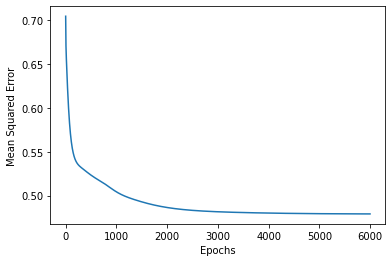

In [ ]:
net = myNeuralNetwork(n_input)
net.fit(x_train, y_train, epochs=6000)

In [ ]:
y_pred_train = net.predict(x_train)
y_pred_bin_train = (y_pred_train >= 0.5).astype("int")

y_pred_val = net.predict(x_val)
y_pred_bin_val = (y_pred_val >= 0.5).astype("int")

accuracy_train = accuracy_score(y_pred_bin_train, y_train)
accuracy_val = accuracy_score(y_pred_bin_val, y_val)
#model performance
print("Training accuracy", accuracy_train)
print("Validation accuracy", accuracy_val)

Training accuracy 0.796875
Validation accuracy 0.765625


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_pred_bin_val, y_val)

array([[113,  28],
       [ 17,  34]])